# THE SPARKS FOUNDATION

# Author : Thiviyaa S

## Graduate Rotational Internship Program

### Task 1 Prediction using Supervised ML 

#### Simple Linear Regression Task

### Step 1 : Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

### Step 2 : Importing Data from the Source

In [2]:
path =  "http://bit.ly/w-data"
Data = pd.read_csv(path)
print("Data is successfully imported")

Data is successfully imported


In [3]:
Data #printing the data from the source

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
Data.head() #printing the top line data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
Data.tail() #printing the bottom line data

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
Data.describe() #describing the data source

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
Data.info() #printing the information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Step 3 : Data Visualization

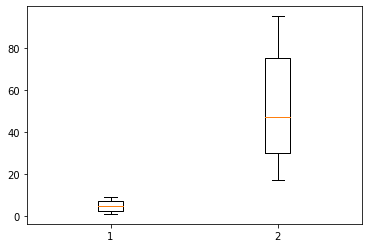

In [8]:
plt.boxplot(Data)
plt.show()

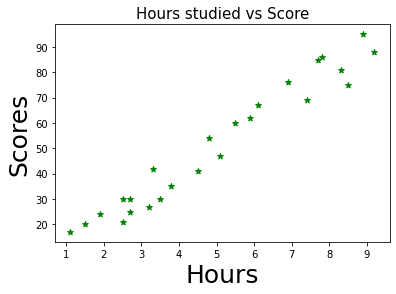

In [9]:
plt.xlabel('Hours',fontsize=25)
plt.ylabel('Scores',fontsize=25)
plt.title('Hours studied vs Score', fontsize=15)
plt.scatter(Data.Hours,Data.Scores,color='green',marker='*')
plt.show()

### Step 4 : Data Preprocessing

In [10]:
X = Data.iloc[:,:-1].values
Y = Data.iloc[:,1].values

In [11]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [12]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

### Step 5 : Model Training

In [13]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state = 0,test_size=0.2)
print("X train.shape =", x_train.shape)
print("X test.shape  =", x_test.shape)
print("Y train.shape =", y_train.shape)
print("Y test.shape  =", y_test.shape)

X train.shape = (20, 1)
X test.shape  = (5, 1)
Y train.shape = (20,)
Y test.shape  = (5,)


In [14]:
linreg=LinearRegression()

In [15]:
linreg.fit(x_train,y_train)
print("Training is finished")

Training is finished


### Step 6 : Plot Line Of Regression

In [16]:
print("B0 =",linreg.intercept_,"\nB1 =",linreg.coef_)

B0 = 2.0181600414346974 
B1 = [9.91065648]


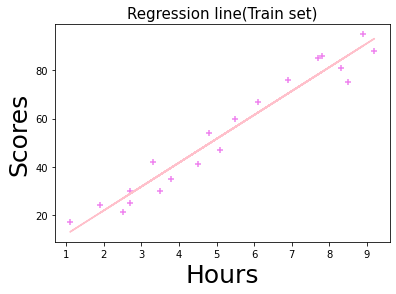

In [17]:
Y0 = linreg.intercept_ + linreg.coef_*x_train
plt.title("Regression line(Train set)",fontsize=15)
plt.scatter(x_train,y_train,color='violet',marker='+')
plt.plot(x_train,Y0,color='pink')
plt.ylabel("Scores",fontsize=25)
plt.xlabel("Hours",fontsize=25)
plt.show()

### Step 7 : Predicting the Scores

In [18]:
Y_pred=linreg.predict(x_test) #predicting the scores
print(Y_pred)
y_test

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


array([20, 27, 69, 30, 62], dtype=int64)

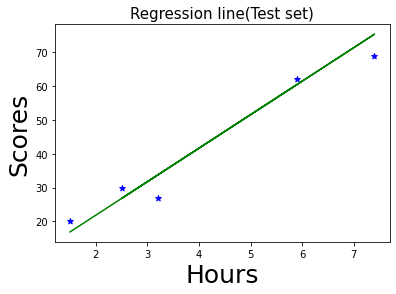

In [19]:
plt.plot(x_test,Y_pred,color='green')
plt.title("Regression line(Test set)",fontsize=15)
plt.scatter(x_test,y_test,color='blue',marker='*')
plt.ylabel("Scores",fontsize=25)
plt.xlabel("Hours",fontsize=25)
plt.show()

### Step 8 : Comapring the Actual and the Predicted

In [20]:
Y_test1 = list(y_test)
predict=list(Y_pred)
df_compare = pd.DataFrame({ 'Actual':Y_test1,'Result':predict})
df_compare

,Actual,Result
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [21]:
print("Training Score:",linreg.score(x_train,y_train))
print("Test Score:",linreg.score(x_test,y_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105355


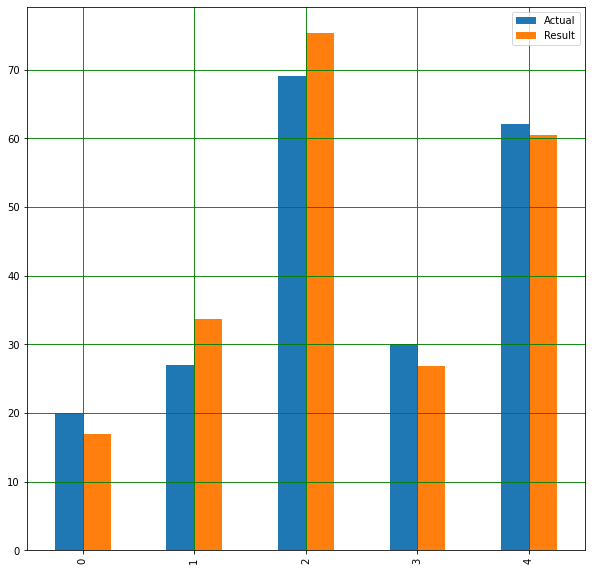

In [22]:
df_compare.plot(kind='bar',figsize=(10,10))
plt.grid(which='major', linewidth='0.9', color='green')
plt.grid(which='minor', linewidth='0.9', color='violet')
plt.show()

### Step 9 : Evaluating the Model

In [23]:
metrics.r2_score(y_test,Y_pred)

0.9454906892105355

In [24]:
MSE = metrics.mean_squared_error(y_test,Y_pred)
root_E = np.sqrt(metrics.mean_squared_error(y_test,Y_pred))
Abs_E = np.sqrt(metrics.mean_squared_error(y_test,Y_pred))
print("Mean Squared Error      = ",MSE)
print("Root Mean Squared Error = ",root_E)
print("Mean Absolute Error     = ",Abs_E)

Mean Squared Error      =  21.598769307217406
Root Mean Squared Error =  4.647447612100367
Mean Absolute Error     =  4.647447612100367


In [25]:
Predicted_score = linreg.predict([[9.25]])
print("Predicted Score for a Student Studying 9.25 hours :",Predicted_score)

Predicted Score for a Student Studying 9.25 hours : [93.69173249]


### Succesfully carried out Prediction using Supervised ML task and was able to evaluate the model's performance on various parameters